# Logistic Regression with Numpy

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Parker\Documents\GitHub\playground\data\ex2data1.txt", header=None)

In [3]:
X = np.array(df[[0, 1]])
y = df[2]

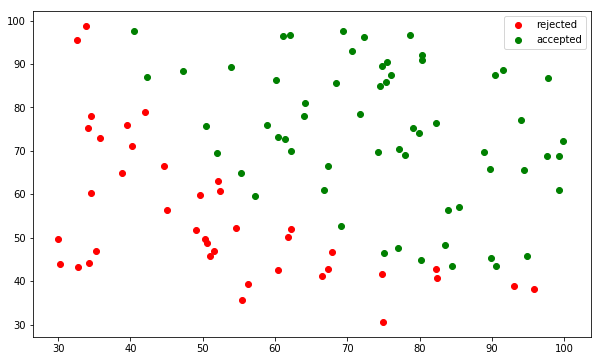

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='rejected')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='g', label='accepted')
plt.legend()

In [7]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [8]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [9]:
model.fit(X, y)

C:\Users\Parker\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [10]:
preds = model.predict(X)
(preds == y).mean()

0.86

In [279]:
model.theta

array([-1115.20413756,    32.29478312,    17.99966199])

In [280]:
from sklearn.linear_model import LogisticRegression

In [281]:
model = LogisticRegression(C=1e20)

In [282]:
model.fit(X, y)

C:\Users\Parker\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [283]:
preds = model.predict(X)
(preds == y).mean()

0.89

In [284]:
model.intercept_, model.coef_

(array([-24.95604647]), array([[0.20459008, 0.19981009]]))